## Scraping

In [93]:
#source = requests.get('http://localhost:8080/ui/termos').text
from selenium import webdriver
import time

In [355]:
driver=webdriver.Chrome('D:\\dev\\projetos\\tcc_data_science\\chromedriver.exe')
regioes = ["vicente-pires"]
for regiao in regioes:
    for i in range(2,3):
        if i==1:
            driver.get(f'https://www.wimoveis.com.br/apartamentos-aluguel-{regiao}-df.html')
        else:
            driver.get(f'https://www.wimoveis.com.br/apartamentos-aluguel-{regiao}-df-pagina-{i}.html')
        html = driver.page_source
        f = open(f'{regiao}_page{i}.html', "w")
        f.write(html)
        f.close()

## Beautiful Soup - open file and commands

In [356]:
from bs4 import BeautifulSoup
import os
import requests
import re
import datetime

In [357]:
#arquivo para logar execução da extração dos dados para eventual verificação
log = open(f'execution_log.txt', "w", encoding="utf-8")
log.write('------------------------------------------------------------------------\n')
log.write(f"inicio_execucao_{datetime.datetime.now().strftime('%Y%m%d_%H%M%S')}\n")

dataset = open(f'dataset.csv', "w", encoding="utf-8")
dataset.write("regiao,area,quartos,banheiros,garagens,condominio,aluguel\n")

# assign directory
directory = 'data_html'

for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        with open(f) as html_file:
            soup = BeautifulSoup(html_file, 'lxml')
        log.write(f"filename: {f}\n")    
        propertiesCards = soup.find_all('div', class_='postingCardInfo')
        print("quantidade de cards encontrados: ", len(propertiesCards))
        # print("example: \n", propertiesCards[0])
        for index, apto in enumerate(propertiesCards):
            log.write(f"index: {index}\n")
            preco = ''
            cond = ''
            area = ''
            beds = ''
            baths = ''
            garages = ''
            try:
                log.write(f"in: {apto.find(class_='firstPrice').text}\n")
                preco = re.search(r'\d+\.?\d+', apto.find(class_="firstPrice").text).group(0).replace('.', '')
                log.write(f"out: {preco}\n")
            except Exception as e:
                print(e)
            try:
                log.write(f"in: {apto.find(class_='postingCardExpenses').text}\n")
                cond = re.search(r'\d+\.?\d+', apto.find(class_="postingCardExpenses").text).group(0).replace('.', '')
                log.write(f"out: {cond}\n")
            except Exception as e:
                print(e)
            mainFeatures = apto.find_all('ul', class_="postingCardMainFeatures")
            for item in mainFeatures:
                listOfLis = item.find_all('li')
                for li in listOfLis:
                    if li.find('i', class_="iconArea"):
                        try:
                            log.write(f"in: {li.text}\n")
                            area = re.search(r'\d+\.?\d?', li.text).group(0).replace('.', '')
                            log.write(f"out: {area}\n")
                        except Exception as e:
                            print(e)                
                    if li.find('i', class_="iconBathrooms"):
                        try:
                            log.write(f"in: {li.text}\n")
                            baths = re.search(r'\d+\.?\d?', li.text).group(0).replace('.', '')
                            log.write(f"out: {baths}\n")
                        except Exception as e:
                            print(e)
                    if li.find('i', class_="iconBedrooms"):
                        try:
                            log.write(f"in: {li.text}\n")
                            beds = re.search(r'\d+\.?\d?', li.text).group(0).replace('.', '')
                            log.write(f"out: {baths}\n")
                        except Exception as e:
                            print(e)
                    if li.find('i', class_="iconGarage"):
                        try:
                            log.write(f"in: {li.text}\n")
                            garages = re.search(r'\d+\.?\d?', li.text).group(0).replace('.', '') 
                            log.write(f"out: {garages}\n")
                        except Exception as e:
                            print(e)                     
                dataset.write(f'{filename.split("_")[0]},{area},{beds},{baths},{garages},{cond},{preco}\n') 

log.write(f"fim_execucao_{datetime.datetime.now().strftime('%Y%m%d_%H%M%S')}\n")
log.close()
dataset.close()

quantidade de cards encontrados:  21
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
quantidade de cards encontrados:  21
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
quantidade de cards encontrados:  21
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
quantidade de cards encontrados:  21
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
quantidade de cards encontrados:  21
'NoneType' object has no attribute 'text'
'NoneType' objec

quantidade de cards encontrados:  21
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
quantidade de cards encontrados:  21
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'N

quantidade de cards encontrados:  13
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
quantidade de cards encontrados:  21
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
quantidade de cards encontrados:  21
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
quantidade de cards encontrados:  21
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
quantidade de cards encontrados:  21
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object

quantidade de cards encontrados:  21
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
quantidade de cards encontrados:  21
quantidade de cards encontrados:  21
'NoneType' object has no attribute 'text'
quantidade de cards encontrados:  21
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
quantidade de cards encontrados:  21
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
quantidade de cards encontrados:  21
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
quantidade de cards encontrados:  21
'NoneType' object has no attribute 'text'
quantidade de cards encontrados:  21
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
quantidade de cards encontrados:  21
'NoneType' object has no attribute 't

In [679]:
import pandas as pd

In [680]:
df = pd.read_csv('dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1921 entries, 0 to 1920
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   regiao      1921 non-null   object 
 1   area        1905 non-null   float64
 2   quartos     1531 non-null   float64
 3   banheiros   1713 non-null   float64
 4   garagens    1006 non-null   float64
 5   condominio  1257 non-null   float64
 6   aluguel     1921 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 105.2+ KB


In [681]:
# links para os outros datasets
# https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_administrativas_do_Distrito_Federal_por_renda_per_capita
# https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_administrativas_do_Distrito_Federal_por_popula%C3%A7%C3%A3o
# http://www.ssp.df.gov.br/dados-por-regiao-administrativa/
d = {'regiao': ['sudoeste', 
                'octogonal', 
                'asa-sul', 
                'asa-norte', 
                'noroeste',
               'taguatinga',
               'aguas-claras',
               'guara',
               'ceilandia',
               'samambaia',
               'sobradinho',
               'gama',
               'park-sul',
               'riacho-fundo',
               'nucleo-bandeirante',
               'vicente-pires',
               'recantodasemas',
               'sao-sebastiao',
               'santamaria',
               'planaltina' 
               ],
     'pib_percapita': [7073.70, 
                       7073.70, 
                       6778.00, 
                       6778.00, 
                       6778.00,
                      2206.60,
                      4407.50,
                      3642.60,
                      1116.10,
                      992.30,
                      2192.30,
                      1596.40,
                      5902.90,
                      1310.40,
                      2381.10,
                      2686.60,
                      857.60,
                      1351.20, 
                      977.00,
                      1140.20]}
df_pib = pd.DataFrame(data=d)
print(df_pib)

                regiao  pib_percapita
0             sudoeste         7073.7
1            octogonal         7073.7
2              asa-sul         6778.0
3            asa-norte         6778.0
4             noroeste         6778.0
5           taguatinga         2206.6
6         aguas-claras         4407.5
7                guara         3642.6
8            ceilandia         1116.1
9            samambaia          992.3
10          sobradinho         2192.3
11                gama         1596.4
12            park-sul         5902.9
13        riacho-fundo         1310.4
14  nucleo-bandeirante         2381.1
15       vicente-pires         2686.6
16      recantodasemas          857.6
17       sao-sebastiao         1351.2
18          santamaria          977.0
19          planaltina         1140.2


In [682]:
df = df.join(df_pib.set_index('regiao'), on='regiao')

### Análise Exploratória

#### Boxplots

<Figure size 576x396 with 0 Axes>

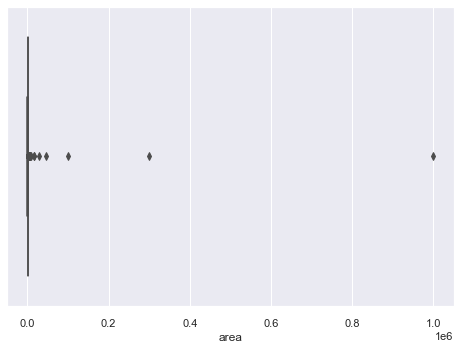

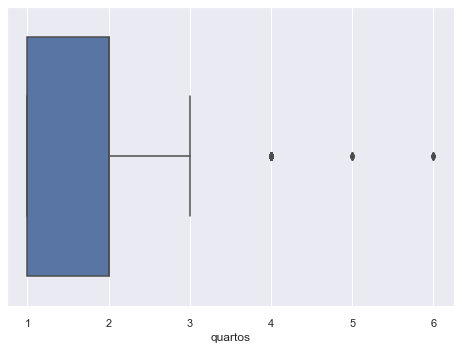

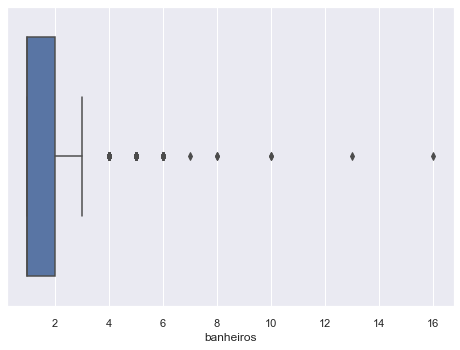

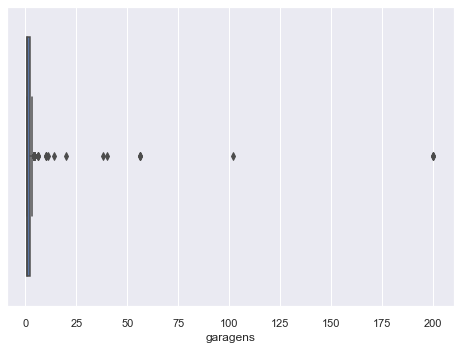

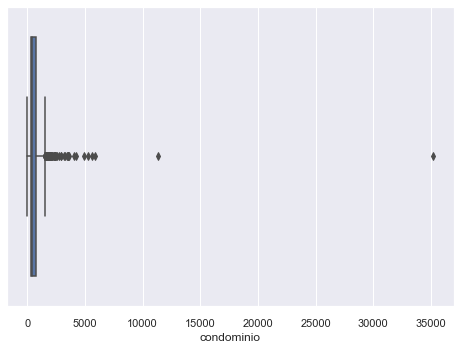

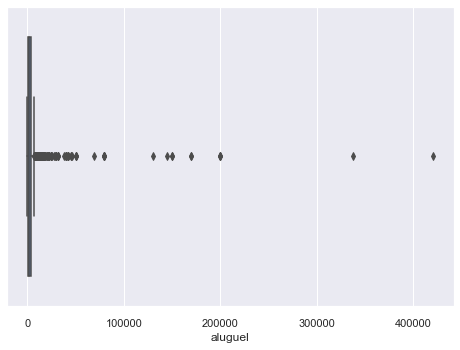

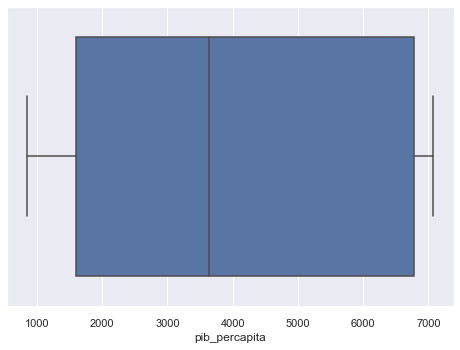

In [683]:
import matplotlib.pyplot as plt
for column in df:
    plt.figure()
    if "regiao" not in column:
        sns.boxplot(x=df[column])

<AxesSubplot:>

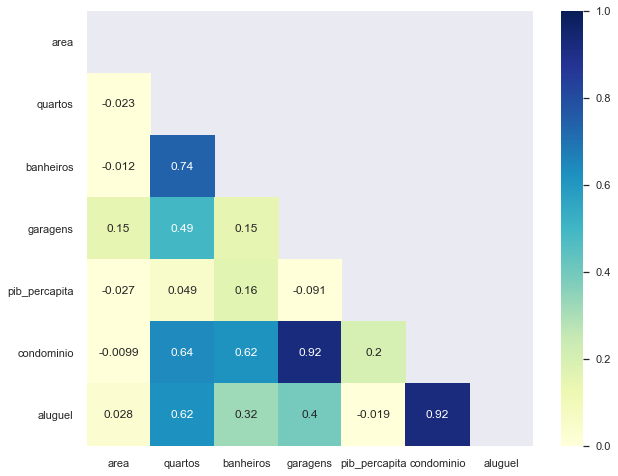

In [684]:
corr = df[['area', 'quartos', 'banheiros', 'garagens', 'pib_percapita', 'condominio', 'aluguel']].corr()
matrix = np.triu(corr)
fig, ax = plt.subplots(figsize=(10,8))  
sns.heatmap(corr, cmap="YlGnBu", annot=True, mask=matrix, vmin=0, vmax=1)

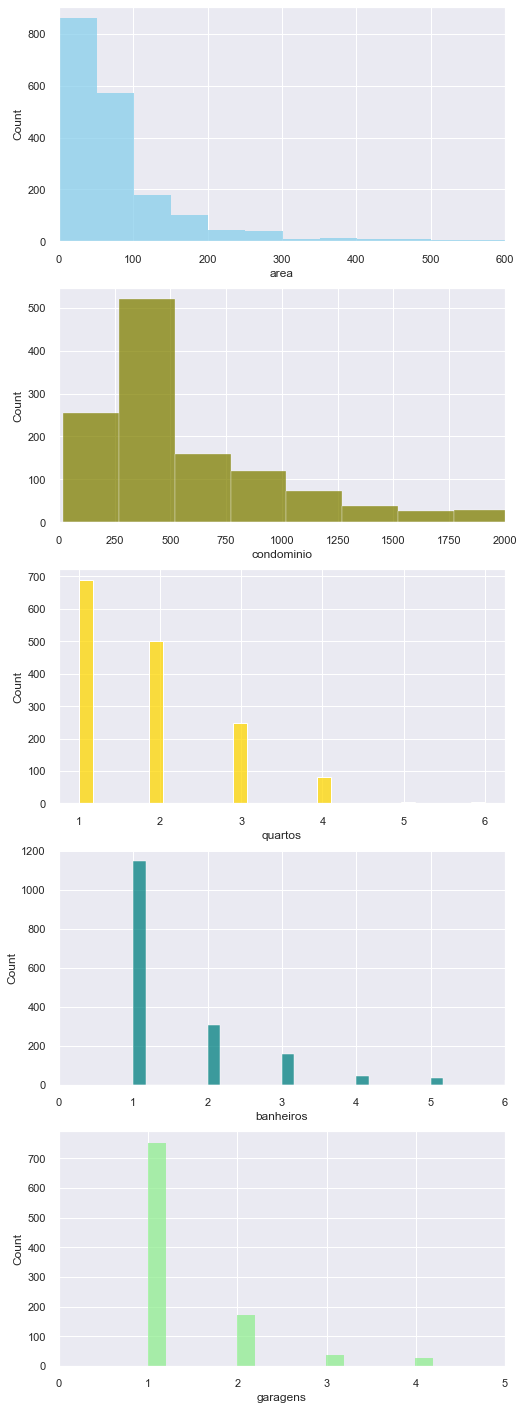

In [685]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")

fig, axs = plt.subplots(5, 1, figsize=(8, 25))

sns.histplot(data=df, x="area", color="skyblue", binwidth=50, ax=axs[0]).set(xlim=(0,600))
sns.histplot(data=df, x="condominio", color="olive", binwidth=250, ax=axs[1]).set(xlim=(0,2000))
sns.histplot(data=df, x="quartos", color="gold", ax=axs[2])
sns.histplot(data=df, x="banheiros", color="teal", ax=axs[3]).set(xlim=(0,6))
sns.histplot(data=df, x="garagens", color="lightgreen", ax=axs[4]).set(xlim=(0,5))

plt.show()

### Limpeza/Transformação dos Dados

#### One Hot Encoding

In [686]:
df = pd.get_dummies(df)
cols = df.columns.tolist()
cols_new = ['area',
 'quartos',
 'banheiros',
 'garagens',
 'condominio',
 'regiao_aguas-claras',
 'regiao_asa-norte',
 'regiao_asa-sul',
 'regiao_ceilandia',
 'regiao_gama',
 'regiao_guara',
 'regiao_noroeste',
 'regiao_nucleo-bandeirante',
 'regiao_octogonal',
 'regiao_park-sul',
 'regiao_planaltina',
 'regiao_recantodasemas',
 'regiao_riacho-fundo',
 'regiao_samambaia',
 'regiao_santamaria',
 'regiao_sao-sebastiao',
 'regiao_sobradinho',
 'regiao_sudoeste',
 'regiao_taguatinga',
 'regiao_vicente-pires',
 'pib_percapita',
 'aluguel']

columnsX = len(cols_new)

# Reorganizar colunas
df = df[cols_new]
df.describe()

,area,quartos,banheiros,garagens,condominio,regiao_aguas-claras,regiao_asa-norte,regiao_asa-sul,regiao_ceilandia,regiao_gama,...,regiao_riacho-fundo,regiao_samambaia,regiao_santamaria,regiao_sao-sebastiao,regiao_sobradinho,regiao_sudoeste,regiao_taguatinga,regiao_vicente-pires,pib_percapita,aluguel
count,1905.000000,1531.000000,1713.000000,1006.000000,1257.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,...,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000
mean,939.120735,1.846506,1.622884,2.340954,658.877486,0.087454,0.109318,0.098386,0.076523,0.043727,...,0.030193,0.073920,0.006767,0.009891,0.046851,0.087454,0.087454,0.015617,4126.656585,4690.862572
std,24060.961871,0.945208,1.198808,11.830984,1191.327752,0.282573,0.312119,0.297914,0.265902,0.204541,...,0.171162,0.261709,0.082006,0.098985,0.211374,0.282573,0.282573,0.124020,2400.418055,17943.735309
min,1.000000,1.000000,1.000000,1.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,857.600000,100.000000
25%,36.000000,1.000000,1.000000,1.000000,292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1596.400000,1000.000000
50%,56.000000,2.000000,1.000000,1.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3642.600000,1523.000000
75%,100.000000,2.000000,2.000000,2.000000,787.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6778.000000,3500.000000
max,1000000.000000,6.000000,16.000000,200.000000,35216.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7073.700000,421173.000000


In [687]:
df = df.dropna(subset=['area'])
df = df.loc[df['area'] < 500]
df = df.loc[df['banheiros'] <= 6]

values = {'garagens': 0, 'banheiros': 1}
df.fillna(value=values, inplace=True)

df = df.dropna()

df.describe()

,area,quartos,banheiros,garagens,condominio,regiao_aguas-claras,regiao_asa-norte,regiao_asa-sul,regiao_ceilandia,regiao_gama,...,regiao_riacho-fundo,regiao_samambaia,regiao_santamaria,regiao_sao-sebastiao,regiao_sobradinho,regiao_sudoeste,regiao_taguatinga,regiao_vicente-pires,pib_percapita,aluguel
count,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,...,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000
mean,71.712166,1.830861,1.625124,0.862512,588.794263,0.094955,0.150346,0.129575,0.013848,0.012859,...,0.023739,0.068249,0.003956,0.003956,0.054402,0.139466,0.036597,0.014837,5084.916518,2585.227498
std,53.619241,0.948202,1.044989,0.747199,483.437626,0.293299,0.357587,0.336001,0.116916,0.112720,...,0.152310,0.252298,0.062807,0.062807,0.226921,0.346603,0.187864,0.120959,2218.671500,2477.581595
min,1.000000,1.000000,1.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,857.600000,360.000000
25%,35.000000,1.000000,1.000000,0.000000,299.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2686.600000,1100.000000
50%,55.000000,2.000000,1.000000,1.000000,416.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6778.000000,1600.000000
75%,83.500000,2.000000,2.000000,1.000000,764.500000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6778.000000,3275.000000
max,380.000000,5.000000,6.000000,4.000000,3600.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7073.700000,16500.000000


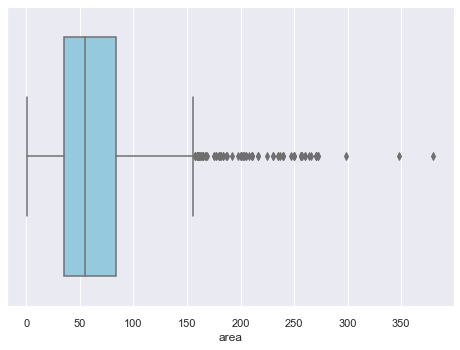

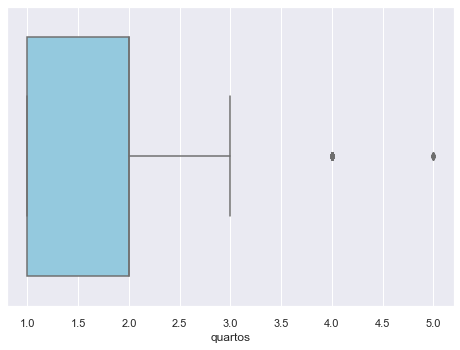

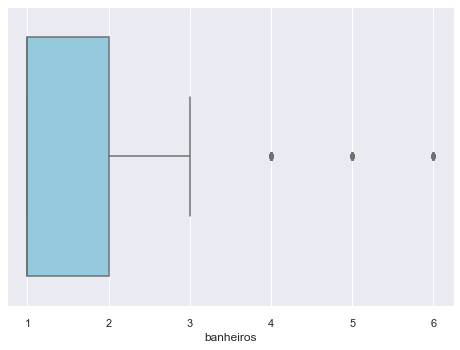

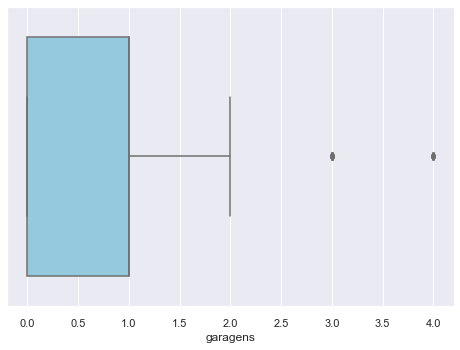

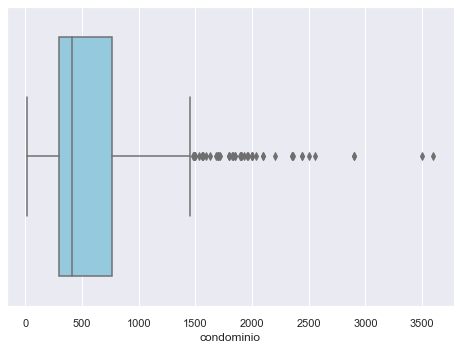

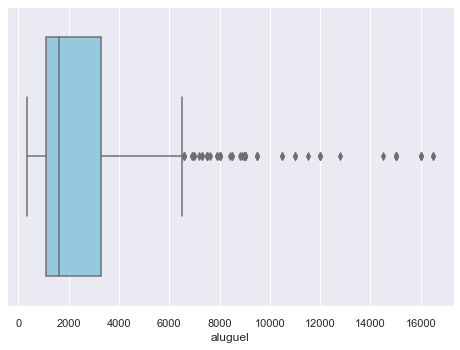

In [688]:
import matplotlib.pyplot as plt
colsBoxPlot = ['area',
 'quartos',
 'banheiros',
 'garagens',
 'condominio',
 'aluguel']

for column in colsBoxPlot:
    plt.figure()
    sns.boxplot(x=df[column], color='skyblue')

<AxesSubplot:>

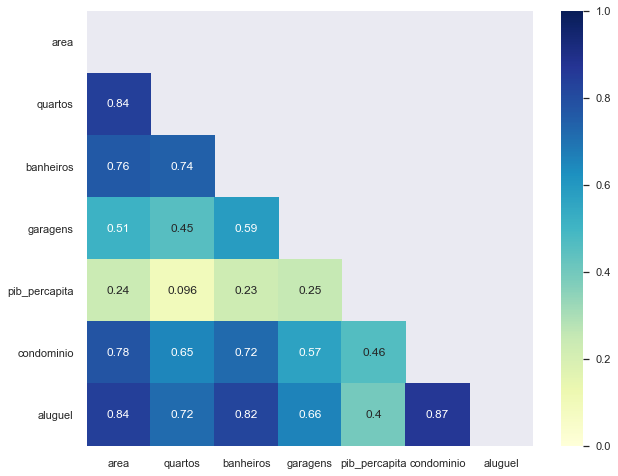

In [689]:
corr = df[['area', 'quartos', 'banheiros', 'garagens', 'pib_percapita', 'condominio', 'aluguel']].corr()
matrix = np.triu(corr)
fig, ax = plt.subplots(figsize=(10,8))  
sns.heatmap(corr, cmap="YlGnBu", annot=True, mask=matrix, vmin=0, vmax=1)

### Modelos

In [690]:
from sklearn.model_selection import train_test_split

In [691]:
X = df.iloc[:,0:(columnsX - 1)]
# from sklearn.preprocessing import PolynomialFeatures
# poly = PolynomialFeatures(degree=2, include_bias=False)
# poly.fit(X)
# X = poly.transform(X)

In [692]:
y = df.iloc[:, -1]

In [693]:
X, y

(       area  quartos  banheiros  garagens  condominio  regiao_aguas-claras  \
 0     156.0      4.0        4.0       2.0      1018.0                    1   
 1     186.0      4.0        2.0       3.0      1072.0                    1   
 3      55.0      2.0        1.0       1.0        80.0                    1   
 4      40.0      1.0        1.0       1.0       342.0                    1   
 6      62.0      2.0        2.0       1.0       420.0                    1   
 ...     ...      ...        ...       ...         ...                  ...   
 1914   48.0      2.0        1.0       0.0       180.0                    0   
 1915   58.0      2.0        2.0       1.0       180.0                    0   
 1916   50.0      2.0        1.0       1.0        50.0                    0   
 1919   40.0      1.0        1.0       0.0       180.0                    0   
 1920   35.0      1.0        1.0       1.0        85.0                    0   
 
       regiao_asa-norte  regiao_asa-sul  regiao_ce

In [694]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20, test_size=0.30)

In [695]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)
print("lr.coef_: ", lr.coef_)
print("lr.intercept_): ", lr.intercept_)
print("training score:\n", lr.score(X_train, y_train))
print("test score\n", lr.score(X_test, y_test))

lr.coef_:  [ 1.67015542e+01 -1.53092036e+02  6.64663438e+02  4.68356268e+02
  1.69919659e+00 -2.97578500e+02 -1.33066172e+01  1.11708336e+02
 -6.51939001e+01 -4.54773327e+01 -6.71739664e+00  3.74433277e+02
 -1.09365567e+02 -5.09521369e+02  2.59667940e+02 -1.13686838e-13
  3.04138685e+02  3.59217450e+02 -3.74960473e+02 -2.85255684e+02
  3.71009566e+02  1.86841748e+02  5.17462457e+01 -1.81632042e+02
 -1.29754365e+02  3.69727350e-02]
lr.intercept_):  -1009.0917931306799
training score:
 0.8803559762739263
test score
 0.8731597321852327


## Ridge

In [696]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("coef_: ", ridge.coef_)
print("intercept_): ", ridge.intercept_)
print("training score:\n", ridge.score(X_train, y_train))
print("test score\n", ridge.score(X_test, y_test))

coef_:  [ 1.66966386e+01 -1.50351365e+02  6.61652900e+02  4.66362666e+02
  1.70180426e+00 -2.91163638e+02 -2.37106467e+01  9.82334126e+01
 -4.44241256e+01 -2.96979220e+01 -2.21304638e+00  3.60455334e+02
 -9.24298796e+01 -4.69672378e+02  2.48100734e+02  0.00000000e+00
  2.13344122e+02  3.55605209e+02 -3.51259739e+02 -2.14291743e+02
  2.88614070e+02  1.92221962e+02  3.98224811e+01 -1.65591907e+02
 -1.11942299e+02  4.16714271e-02]
intercept_):  -1030.2018662441606
training score:
 0.8803312144729359
test score
 0.8733453119575256


## Lasso

In [697]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1).fit(X_train, y_train)
print("lr.coef_: ", lasso.coef_)
print("lr.intercept_): ", lasso.intercept_)
print("training score:\n", lasso.score(X_train, y_train))
print("test score\n", lasso.score(X_test, y_test))

lr.coef_:  [ 1.66932844e+01 -1.52102089e+02  6.64088369e+02  4.67960598e+02
  1.69987655e+00 -2.97802451e+02 -5.91572636e+01  6.40534523e+01
 -0.00000000e+00  0.00000000e+00  4.47933387e+00  3.27335910e+02
 -6.71445246e+01 -5.53804542e+02  2.28125950e+02  0.00000000e+00
  3.34091539e+02  4.12552156e+02 -3.10542239e+02 -2.04113982e+02
  4.03295259e+02  2.25309616e+02 -0.00000000e+00 -1.39221711e+02
 -9.29465774e+01  5.58989756e-02]
lr.intercept_):  -1091.3026669843998
training score:
 0.8803539760648608
test score
 0.8732417025159956


## ElasticNet

In [698]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score, GridSearchCV

el = ElasticNet()

scores = cross_val_score(el, X, y, cv=10)

print("CrossV scores: {}".format(scores))
print("CrossV scores mean: {}".format(scores.mean()))

param_grid = {"alpha": [ 0.01, 0.1, 1],
              "l1_ratio": [0.05, 0.5]}

gs = GridSearchCV(el, param_grid, cv=10, return_train_score=True)
gs.fit(X_train, y_train)

print('test set score: {:.2f}'.format(gs.score(X_test, y_test)))
print('best_score: {}'.format(gs.best_score_))
print('best_params: {}'.format(gs.best_params_))
print('best_estimator: {}'.format(gs.best_estimator_))

CrossV scores: [0.67727791 0.8225093  0.76175785 0.82096438 0.92337321 0.75809668
 0.85903612 0.01617004 0.91235292 0.79541363]
CrossV scores mean: 0.734695205414719
test set score: 0.87
best_score: 0.8621914923285925
best_params: {'alpha': 0.1, 'l1_ratio': 0.5}
best_estimator: ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)


## Random Forest

In [699]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()

scores_rfr = cross_val_score(rfr, X, y, cv=5)

print("CrossV scores: {}".format(scores_rfr))
print("CrossV scores mean: {}".format(scores_rfr.mean()))

param_grid_rfr = {"n_estimators": [ 10, 50, 100],
              "min_samples_split": [2, 3, 4, 5, 6, 7, 8]}

gs2 = GridSearchCV(rfr, param_grid_rfr, cv=5, return_train_score=True)
gs2.fit(X_train, y_train)

print('test set score: {:.4f}'.format(gs2.score(X_test, y_test)))

print('best_score: {}'.format(gs2.best_score_))

print('best_params: {}'.format(gs2.best_params_))

print('best_estimator: {}'.format(gs2.best_estimator_))

CrossV scores: [0.82969641 0.82355757 0.80793282 0.9326037  0.91768061]
CrossV scores mean: 0.8622942237929587
test set score: 0.9105
best_score: 0.9021213150058633
best_params: {'min_samples_split': 3, 'n_estimators': 100}
best_estimator: RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=3, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)


In [711]:
from pycaret.regression import *
reg1 = setup(data = df, target = 'aluguel', polynomial_features=True)
# return best model
best = compare_models()
# # return top 3 models based on 'R2'
# top3 = compare_models(n_select = 3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,437.1478,541396.5354,727.5498,0.9068,0.2340,0.1875,0.1750
et,Extra Trees Regressor,398.6721,533664.1469,722.4447,0.9056,0.2314,0.1688,0.1750
xgboost,Extreme Gradient Boosting,418.1213,569123.4943,745.1473,0.9024,0.2436,0.1812,0.1430
gbr,Gradient Boosting Regressor,467.9282,552030.3868,735.6943,0.9019,0.2520,0.2086,0.0280
lightgbm,Light Gradient Boosting Machine,490.6867,690323.8610,816.1641,0.8806,0.2446,0.1987,0.0180
llar,Lasso Least Angle Regression,590.8912,797377.6442,874.5975,0.8666,0.3856,0.2772,0.0080
br,Bayesian Ridge,593.0324,807263.0513,879.8296,0.8654,0.3837,0.2801,0.0080
lasso,Lasso Regression,597.4589,807650.7059,881.3547,0.8647,0.4477,0.2862,0.0090
ridge,Ridge Regression,596.8142,807594.9079,881.6520,0.8646,0.4349,0.2857,0.0080
lr,Linear Regression,599.3959,810938.0263,882.7762,0.8642,0.4386,0.2856,0.0070


In [712]:
xgboost = create_model('xgboost')
xgboost_tuned = tune_model(xgboost, n_iter=25)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,444.0027,662684.1721,814.0542,0.9091,0.2869,0.2226
1,463.8072,688061.0689,829.4945,0.9334,0.2473,0.1674
2,452.9625,620843.3653,787.9361,0.8950,0.2306,0.1878
3,346.2744,266633.9343,516.3661,0.9176,0.1939,0.1572
4,314.9125,263415.5648,513.2403,0.9224,0.2262,0.1785
5,481.6861,612579.0503,782.6743,0.8856,0.2583,0.2097
6,490.2842,546154.7104,739.0228,0.8678,0.2433,0.1969
7,409.9299,408180.0050,638.8897,0.9089,0.2585,0.2023
8,333.0009,514773.0396,717.4769,0.9248,0.2102,0.1545
9,389.0881,675090.8933,821.6392,0.9398,0.1674,0.1199


In [713]:
xgboost_tuned

# "XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#              colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
#              importance_type='gain', interaction_constraints='',
#              learning_rate=0.05, max_delta_step=0, max_depth=8,
#              min_child_weight=2, missing=nan, monotone_constraints='()',
#              n_estimators=220, n_jobs=-1, num_parallel_tree=1,
#              objective='reg:squarederror', random_state=8550, reg_alpha=4,
#              reg_lambda=0.01, scale_pos_weight=48.80000000000001, subsample=1,
#              tree_method='auto', validate_parameters=1, verbosity=0)"

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.9, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=11,
             min_child_weight=3, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=-1, num_parallel_tree=1,
             objective='reg:squarederror', random_state=5060, reg_alpha=4,
             reg_lambda=0.4, scale_pos_weight=5.2, subsample=0.7,
             tree_method='auto', validate_parameters=1, verbosity=0)

In [714]:
gbr = create_model('gbr')
gbr_tuned = tune_model(gbr, n_iter=25)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,418.2916,477574.4347,691.0676,0.9345,0.2626,0.2166
1,450.4524,665893.7771,816.0231,0.9355,0.2382,0.1633
2,486.2579,681926.7786,825.7886,0.8847,0.2360,0.1992
3,347.6906,285658.0557,534.4699,0.9117,0.1890,0.1531
4,326.0101,245504.9058,495.4845,0.9277,0.2284,0.1844
5,470.8668,469722.6090,685.3631,0.9123,0.2607,0.2150
6,510.4149,545627.4124,738.6660,0.8679,0.2553,0.2138
7,405.8654,367410.5806,606.1440,0.9180,0.2376,0.1990
8,354.3587,565414.3427,751.9404,0.9174,0.2011,0.1573
9,347.3866,418987.4305,647.2924,0.9626,0.1734,0.1314


In [715]:
rf = create_model('rf')
rf_tuned = tune_model(rf, n_iter=25)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,502.5916,646521.4406,804.0656,0.9113,0.2833,0.2322
1,557.6020,844975.0147,919.2252,0.9182,0.2422,0.1823
2,537.0189,777151.9370,881.5622,0.8686,0.2476,0.2161
3,387.1647,282819.6822,531.8079,0.9126,0.2152,0.1904
4,368.2960,317640.5924,563.5961,0.9065,0.2451,0.2045
5,542.0265,666442.9077,816.3595,0.8755,0.2711,0.2277
6,584.2679,690589.2511,831.0170,0.8328,0.2709,0.2336
7,408.8874,407936.4331,638.6990,0.9090,0.2423,0.1985
8,369.4149,491207.7106,700.8621,0.9283,0.2236,0.1731
9,443.4437,796021.6774,892.2005,0.9290,0.1779,0.1410


In [716]:
et = create_model('et')
et_tuned = tune_model(et, n_iter=25)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,484.2499,611066.2460,781.7073,0.9162,0.2719,0.2224
1,554.6333,764478.3797,874.3445,0.9260,0.2526,0.1858
2,536.9510,856927.2939,925.7037,0.8551,0.2613,0.2244
3,464.7493,484024.0598,695.7184,0.8503,0.2355,0.2064
4,320.1568,200888.5219,448.2059,0.9408,0.2196,0.1882
5,518.3415,530169.3105,728.1273,0.9010,0.2746,0.2358
6,513.5816,565082.5321,751.7197,0.8632,0.2523,0.2099
7,451.8688,498162.3515,705.8062,0.8889,0.2582,0.2107
8,359.4878,529222.6641,727.4769,0.9227,0.2257,0.1760
9,452.6702,805462.8615,897.4758,0.9281,0.1848,0.1435


In [717]:
blender_specific = blend_models(estimator_list = [gbr_tuned, rf_tuned, xgboost_tuned, et_tuned])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,452.3051,548049.7481,740.3038,0.9249,0.2693,0.2200
1,494.5803,688206.6496,829.5822,0.9334,0.2379,0.1697
2,484.8270,682756.7502,826.2910,0.8846,0.2340,0.1994
3,363.5746,278811.6976,528.0262,0.9138,0.1988,0.1695
4,322.9575,233021.3469,482.7228,0.9314,0.2212,0.1850
5,494.0918,531543.1662,729.0701,0.9007,0.2600,0.2175
6,501.7418,524508.2270,724.2294,0.8730,0.2466,0.2075
7,401.1559,377076.1765,614.0653,0.9159,0.2392,0.1941
8,336.4425,505842.7915,711.2263,0.9261,0.2070,0.1598
9,369.9800,604736.2306,777.6479,0.9460,0.1634,0.1236


In [718]:
final_rf = finalize_model(blender_specific)

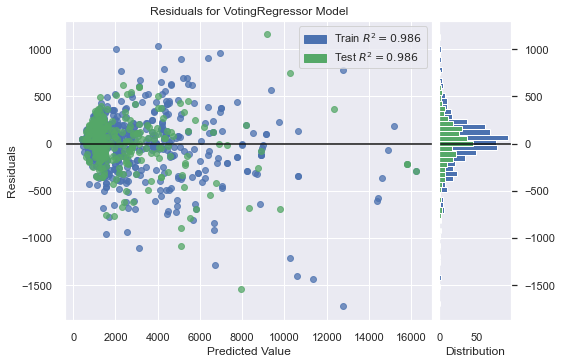

In [719]:
plot_model(final_rf)

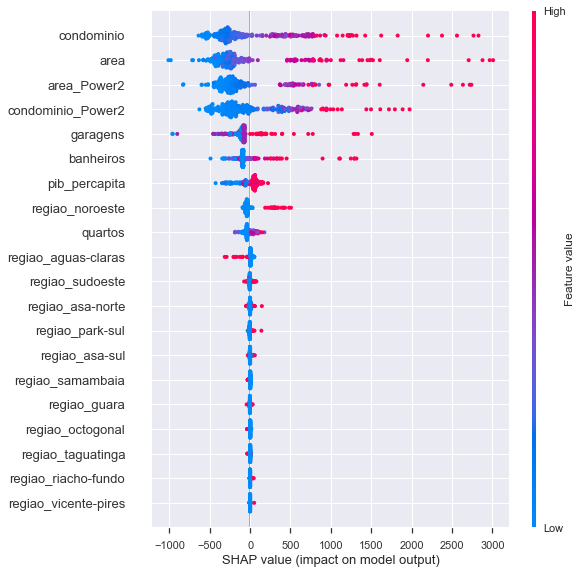

In [720]:
interpret_model(rf)

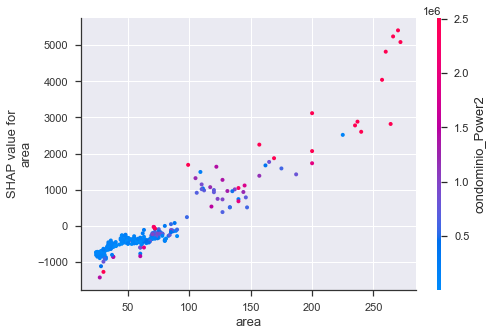

In [721]:
interpret_model(xgboost_tuned, plot = 'correlation')''

In [729]:
final_rf.estimators

[('gbr',
  GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                            init=None, learning_rate=0.05, loss='ls', max_depth=6,
                            max_features='log2', max_leaf_nodes=None,
                            min_impurity_decrease=0.01, min_impurity_split=None,
                            min_samples_leaf=1, min_samples_split=2,
                            min_weight_fraction_leaf=0.0, n_estimators=240,
                            n_iter_no_change=None, presort='deprecated',
                            random_state=5060, subsample=0.45, tol=0.0001,
                            validation_fraction=0.1, verbose=0, warm_start=False)),
 ('rf',
  RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                        max_depth=11, max_features=1.0, max_leaf_nodes=None,
                        max_samples=None, min_impurity_decrease=0.001,
                        min_impurity_split=None, min_samples_leaf=3,
   